In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit 
from sklearn.metrics import mean_squared_error
import math


data = pd.DataFrame()
data[0] = [48.537,196.22,375.42,610.44,963.75,1238.6,1360.8,1753.7,2185.7,2432,2735.1,2911.5,3406,3814.9,3980.9,4290.4,4821.5]
data[0.25] = [49.642,206.29,364.94,667.24,932.42,1219.7,1426.2,1784.1,2086.6,2402.1,2828,3034.1,3251,3668.5,4175.5,4402,4858]
data[0.5] = [51.753,225.39,305.78,748.88,875.23,1148.9,1542.8,1975,2069.3,2581.1,2692.7,3330.8,3518.9,3863.4,4031.6,4813.1,4897.1]
data[0.75] = [48.146,227.31,298.65,834.22,997.74,1060.3,1711.1,2094.5,2303.2,2480.2,3497,3986.8,4109.4,4391.6,4621,0,0]
data[1] = [64.842,359.97,370.05,1039.7,1259.4,1386.9,2047.8,2438.1,2986.6,3100.2,3386.1,3945.8,4970.5,0,0,0,0]

data

0.00      0.25      0.50      0.75      1.00
0     48.537    49.642    51.753    48.146    64.842
1    196.220   206.290   225.390   227.310   359.970
2    375.420   364.940   305.780   298.650   370.050
3    610.440   667.240   748.880   834.220  1039.700
4    963.750   932.420   875.230   997.740  1259.400
5   1238.600  1219.700  1148.900  1060.300  1386.900
6   1360.800  1426.200  1542.800  1711.100  2047.800
7   1753.700  1784.100  1975.000  2094.500  2438.100
8   2185.700  2086.600  2069.300  2303.200  2986.600
9   2432.000  2402.100  2581.100  2480.200  3100.200
10  2735.100  2828.000  2692.700  3497.000  3386.100
11  2911.500  3034.100  3330.800  3986.800  3945.800
12  3406.000  3251.000  3518.900  4109.400  4970.500
13  3814.900  3668.500  3863.400  4391.600     0.000
14  3980.900  4175.500  4031.600  4621.000     0.000
15  4290.400  4402.000  4813.100     0.000     0.000
16  4821.500  4858.000  4897.100     0.000     0.000

In [3]:
datas = data.transpose()
datas

0       1       2        3        4       5       6       7  \
0.00  48.537  196.22  375.42   610.44   963.75  1238.6  1360.8  1753.7   
0.25  49.642  206.29  364.94   667.24   932.42  1219.7  1426.2  1784.1   
0.50  51.753  225.39  305.78   748.88   875.23  1148.9  1542.8  1975.0   
0.75  48.146  227.31  298.65   834.22   997.74  1060.3  1711.1  2094.5   
1.00  64.842  359.97  370.05  1039.70  1259.40  1386.9  2047.8  2438.1   

           8       9      10      11      12      13      14      15      16  
0.00  2185.7  2432.0  2735.1  2911.5  3406.0  3814.9  3980.9  4290.4  4821.5  
0.25  2086.6  2402.1  2828.0  3034.1  3251.0  3668.5  4175.5  4402.0  4858.0  
0.50  2069.3  2581.1  2692.7  3330.8  3518.9  3863.4  4031.6  4813.1  4897.1  
0.75  2303.2  2480.2  3497.0  3986.8  4109.4  4391.6  4621.0     0.0     0.0  
1.00  2986.6  3100.2  3386.1  3945.8  4970.5     0.0     0.0     0.0     0.0

In [4]:
datas_2 = datas.reindex(index=datas.index[::-1])
datas_2

0       1       2        3        4       5       6       7  \
1.00  64.842  359.97  370.05  1039.70  1259.40  1386.9  2047.8  2438.1   
0.75  48.146  227.31  298.65   834.22   997.74  1060.3  1711.1  2094.5   
0.50  51.753  225.39  305.78   748.88   875.23  1148.9  1542.8  1975.0   
0.25  49.642  206.29  364.94   667.24   932.42  1219.7  1426.2  1784.1   
0.00  48.537  196.22  375.42   610.44   963.75  1238.6  1360.8  1753.7   

           8       9      10      11      12      13      14      15      16  
1.00  2986.6  3100.2  3386.1  3945.8  4970.5     0.0     0.0     0.0     0.0  
0.75  2303.2  2480.2  3497.0  3986.8  4109.4  4391.6  4621.0     0.0     0.0  
0.50  2069.3  2581.1  2692.7  3330.8  3518.9  3863.4  4031.6  4813.1  4897.1  
0.25  2086.6  2402.1  2828.0  3034.1  3251.0  3668.5  4175.5  4402.0  4858.0  
0.00  2185.7  2432.0  2735.1  2911.5  3406.0  3814.9  3980.9  4290.4  4821.5

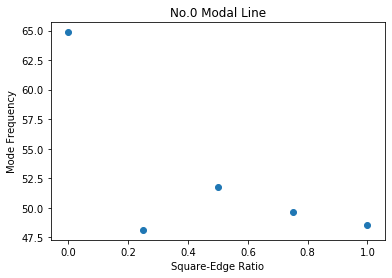

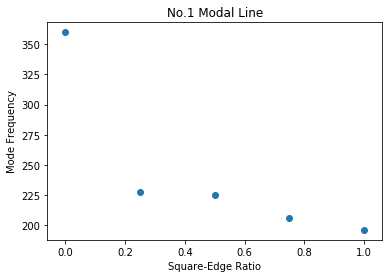

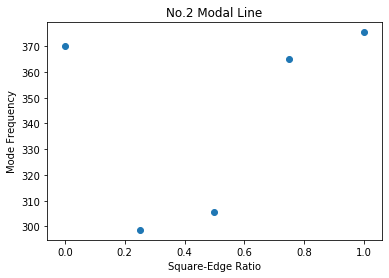

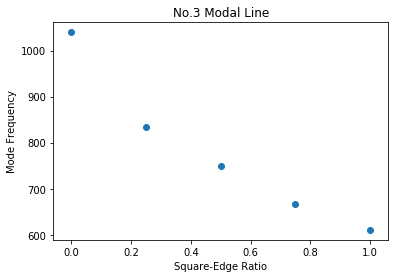

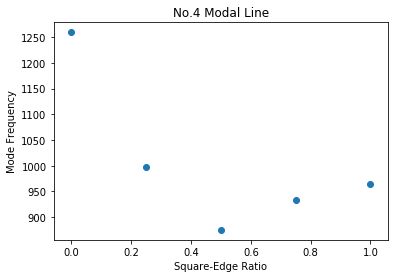

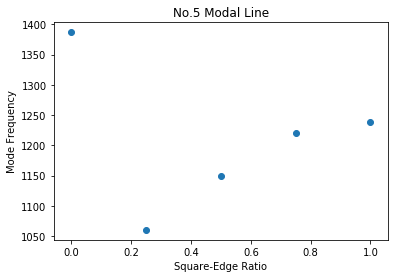

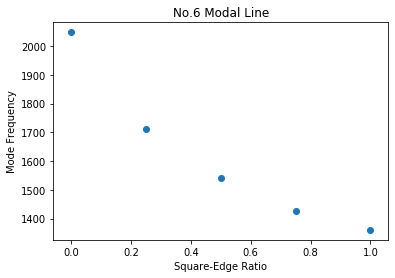

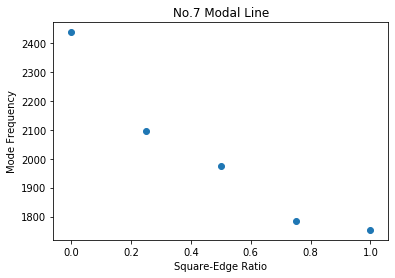

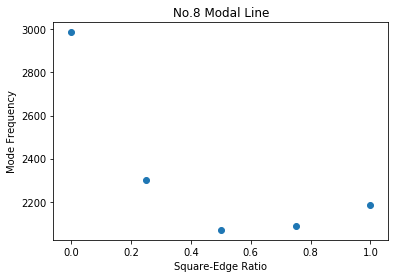

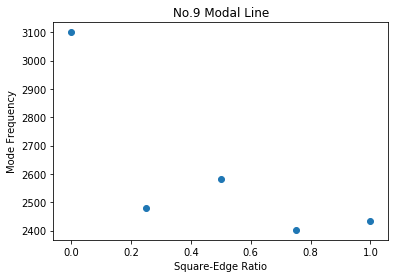

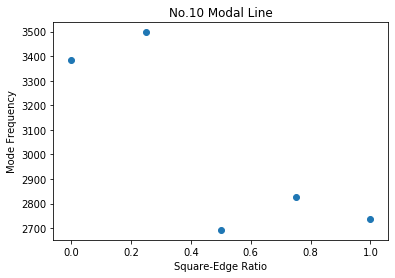

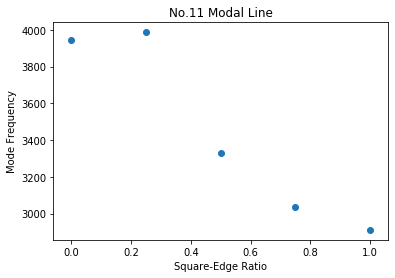

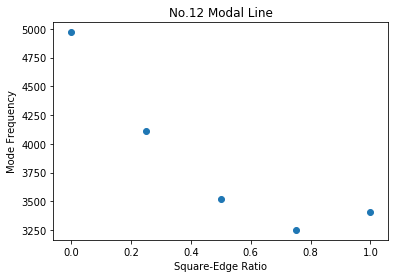

In [37]:
for i in range(len(data)-4):
    plt.scatter(datas.index,datas[i])
    plt.xlabel('Square-Edge Ratio')
    plt.ylabel('Mode Frequency')
    plt.title('No.'+str(i)+' Modal Line')
    plt.show()

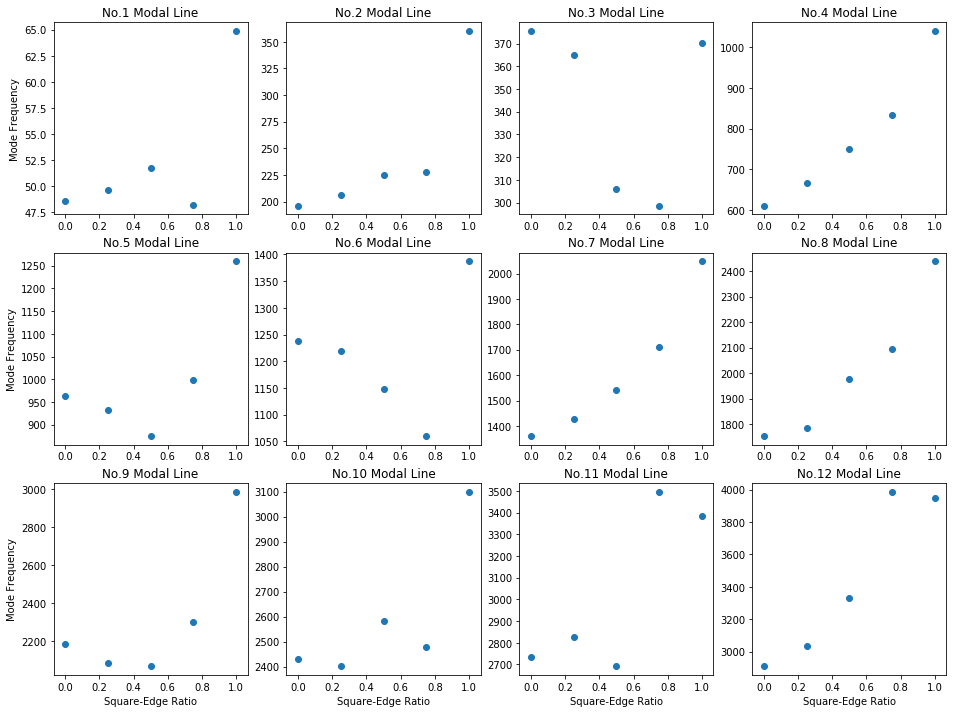

In [17]:
#Manual Attempt
plt.figure(figsize=(16,12)) #row length
plt.subplot(3,4,1)
plt.scatter(datas.index,datas[0])
#plt.xlabel('Square-Edge Ratio')
plt.ylabel('Mode Frequency')
plt.title('No.'+str(1)+' Modal Line')

plt.subplot(3,4,2)
plt.scatter(datas.index,datas[1])
#plt.xlabel('Square-Edge Ratio')
#plt.ylabel('Mode Frequency')
plt.title('No.'+str(2)+' Modal Line')

plt.subplot(3,4,3)
plt.scatter(datas.index,datas[2])
#plt.xlabel('Square-Edge Ratio')
#plt.ylabel('Mode Frequency')
plt.title('No.'+str(3)+' Modal Line')

plt.subplot(3,4,4)
plt.scatter(datas.index,datas[3])
#plt.xlabel('Square-Edge Ratio')
#plt.ylabel('Mode Frequency')
plt.title('No.'+str(4)+' Modal Line')
#-------------------------
plt.subplot(3,4,5)
plt.scatter(datas.index,datas[4])
#plt.xlabel('Square-Edge Ratio')
plt.ylabel('Mode Frequency')
plt.title('No.'+str(5)+' Modal Line')

plt.subplot(3,4,6)
plt.scatter(datas.index,datas[5])
#plt.xlabel('Square-Edge Ratio')
#plt.ylabel('Mode Frequency')
plt.title('No.'+str(6)+' Modal Line')

plt.subplot(3,4,7)
plt.scatter(datas.index,datas[6])
#plt.xlabel('Square-Edge Ratio')
#plt.ylabel('Mode Frequency')
plt.title('No.'+str(7)+' Modal Line')

plt.subplot(3,4,8)
plt.scatter(datas.index,datas[7])
#plt.xlabel('Square-Edge Ratio')
#plt.ylabel('Mode Frequency')
plt.title('No.'+str(8)+' Modal Line')
#-------------------------
plt.subplot(3,4,9)
plt.scatter(datas.index,datas[8])
plt.xlabel('Square-Edge Ratio')
plt.ylabel('Mode Frequency')
plt.title('No.'+str(9)+' Modal Line')

plt.subplot(3,4,10)
plt.scatter(datas.index,datas[9])
plt.xlabel('Square-Edge Ratio')
#plt.ylabel('Mode Frequency')
plt.title('No.'+str(10)+' Modal Line')

plt.subplot(3,4,11)
plt.scatter(datas.index,datas[10])
plt.xlabel('Square-Edge Ratio')
#plt.ylabel('Mode Frequency')
plt.title('No.'+str(11)+' Modal Line')

plt.subplot(3,4,12)
plt.scatter(datas.index,datas[11])
plt.xlabel('Square-Edge Ratio')
#plt.ylabel('Mode Frequency')
plt.title('No.'+str(12)+' Modal Line')
plt.savefig('Modal Line Frequency.jpg')

In [55]:
def squircle_func(r,s):
    # https://en.wikipedia.org/wiki/Squircle
    x = np.linspace(-3,3,1000)
    coef = 1 - (s**2)*(x**2)/r**2
    y_ = np.sqrt((1-x**2)/coef)
    return x,y_

#x,y_ = squircle_func(r,s)
#plt.plot(x,y_)
#plt.plot(x,-y_)
#plt.xlim(-label,label)
#plt.ylim(-label,label)

In [58]:
x = np.linspace(-3,3,1000)
label= 1.6
squircle_table[1.2]

0      4.264014
1      4.282533
2      4.301428
3      4.320712
4      4.340397
         ...   
995    4.340397
996    4.320712
997    4.301428
998    4.282533
999    4.264014
Name: 1.2, Length: 1000, dtype: float64

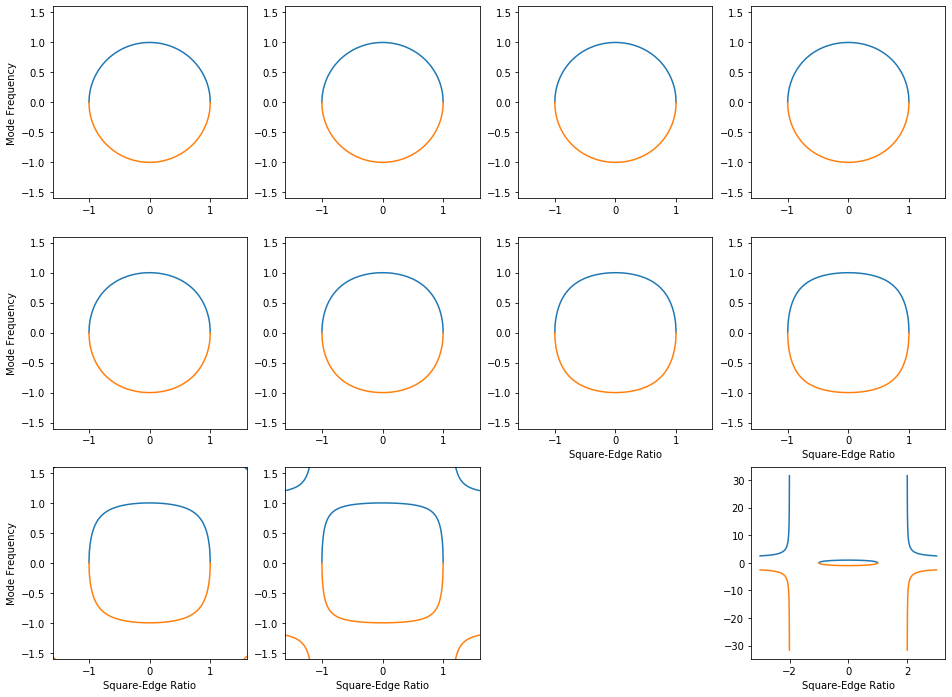

In [67]:
x = np.linspace(-3,3,1000)
label= 1.6
squircle_table[1.2]

#Manual Attempt
plt.figure(figsize=(16,12)) #row length
plt.subplot(3,4,1)
y_ = squircle_table[0.0]
plt.plot(x,y_)
plt.plot(x,-y_)
plt.xlim(-label,label)
plt.ylim(-label,label)

#plt.xlabel('Square-Edge Ratio')
plt.ylabel('Mode Frequency')
#plt.title('No.'+str(1)+' Modal Line')

plt.subplot(3,4,2)
y_ = squircle_table[0.3]
plt.plot(x,y_)
plt.plot(x,-y_)
plt.xlim(-label,label)
plt.ylim(-label,label)
#plt.xlabel('Square-Edge Ratio')
#plt.ylabel('Mode Frequency')
#plt.title('No.'+str(2)+' Modal Line')

plt.subplot(3,4,3)
y_ = squircle_table[0.6]
plt.plot(x,y_)
plt.plot(x,-y_)
plt.xlim(-label,label)
plt.ylim(-label,label)
#plt.xlabel('Square-Edge Ratio')
#plt.ylabel('Mode Frequency')
#plt.title('No.'+str(3)+' Modal Line')

plt.subplot(3,4,4)
y_ = squircle_table[0.9]
plt.plot(x,y_)
plt.plot(x,-y_)
plt.xlim(-label,label)
plt.ylim(-label,label)
#plt.xlabel('Square-Edge Ratio')
#plt.ylabel('Mode Frequency')
#plt.title('No.'+str(4)+' Modal Line')

#------ 
plt.subplot(3,4,5)
y_ = squircle_table[1.2]
plt.plot(x,y_)
plt.plot(x,-y_)
plt.xlim(-label,label)
plt.ylim(-label,label)

#plt.xlabel('Square-Edge Ratio')
plt.ylabel('Mode Frequency')
#plt.title('No.'+str(1)+' Modal Line')

plt.subplot(3,4,6)
y_ = squircle_table[1.5]
plt.plot(x,y_)
plt.plot(x,-y_)
plt.xlim(-label,label)
plt.ylim(-label,label)
#plt.xlabel('Square-Edge Ratio')
#plt.ylabel('Mode Frequency')
#plt.title('No.'+str(2)+' Modal Line')

plt.subplot(3,4,7)
y_ = squircle_table[1.8]
plt.plot(x,y_)
plt.plot(x,-y_)
plt.xlim(-label,label)
plt.ylim(-label,label)
plt.xlabel('Square-Edge Ratio')
#plt.ylabel('Mode Frequency')
#plt.title('No.'+str(3)+' Modal Line')

plt.subplot(3,4,8)
y_ = squircle_table[2.1]
plt.plot(x,y_)
plt.plot(x,-y_)
plt.xlim(-label,label)
plt.ylim(-label,label)
plt.xlabel('Square-Edge Ratio')
#plt.ylabel('Mode Frequency')
#plt.title('No.'+str(4)+' Modal Line')

#------
plt.subplot(3,4,9)
y_ = squircle_table[2.4]
plt.plot(x,y_)
plt.plot(x,-y_)
plt.xlim(-label,label)
plt.ylim(-label,label)

plt.xlabel('Square-Edge Ratio')
plt.ylabel('Mode Frequency')
#plt.title('No.'+str(1)+' Modal Line')

plt.subplot(3,4,10)
y_ = squircle_table[2.7]
plt.plot(x,y_)
plt.plot(x,-y_)
plt.xlim(-label,label)
plt.ylim(-label,label)
plt.xlabel('Square-Edge Ratio')
#plt.ylabel('Mode Frequency')
#plt.title('No.'+str(2)+' Modal Line')

plt.subplot(3,4,12)
y_ = squircle_table[1.5]
plt.plot(x,y_)
plt.plot(x,-y_)
#plt.xlim(-label,label)
#plt.ylim(-label,label)
plt.xlabel('Square-Edge Ratio')
plt.savefig('data_analysis_squircle.jpg')

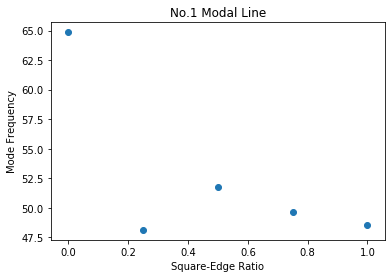

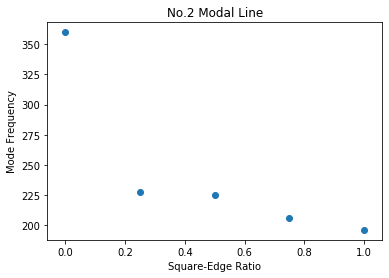

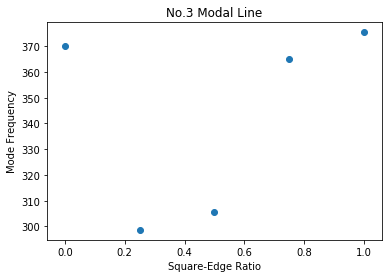

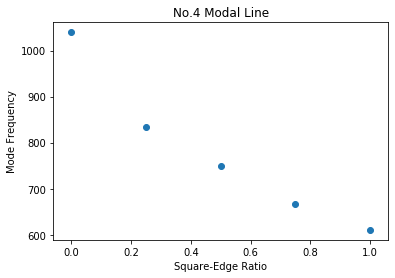

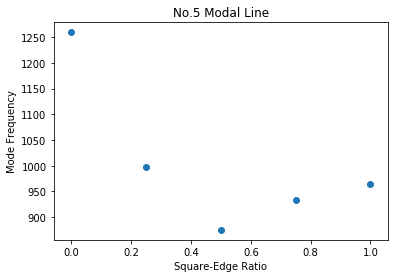

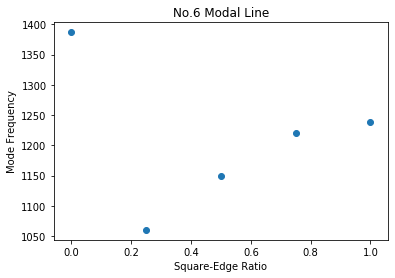

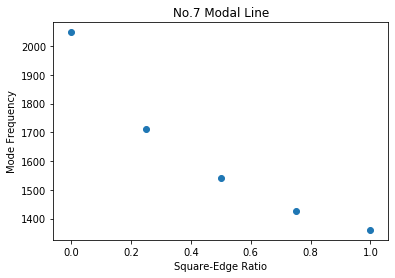

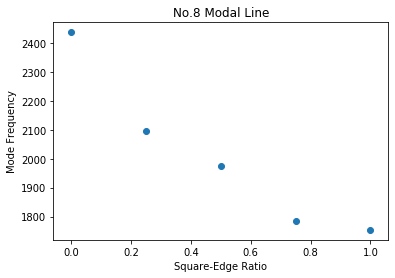

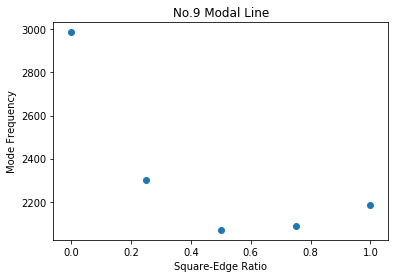

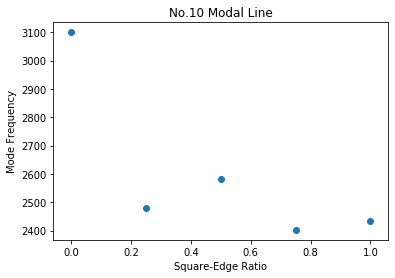

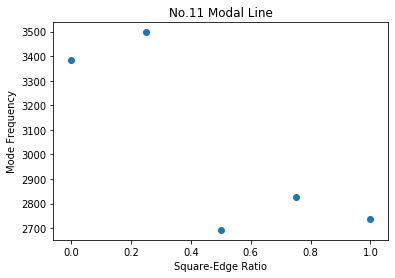

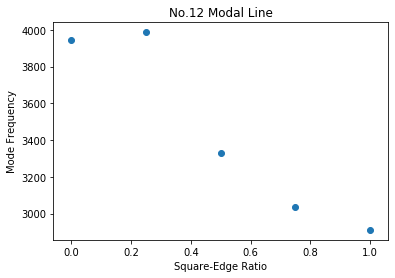

In [42]:
for i in range(len(data)-5):
    plt.scatter(datas.index,datas[i])
    plt.xlabel('Square-Edge Ratio')
    plt.ylabel('Mode Frequency')
    plt.title('No.'+str(i+1)+' Modal Line')
    plt.show()

In [ ]:
plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.title('Circle, Bessel Equation')
plt.plot(x,y1)

In [5]:
#for i in range(len(data)):
#    fitting_exp_function(datas.index,datas[i],'data_1_'+str(i))

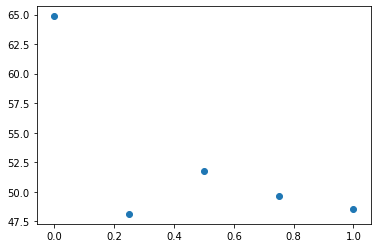

In [6]:
plt.scatter(datas.index,datas[0])

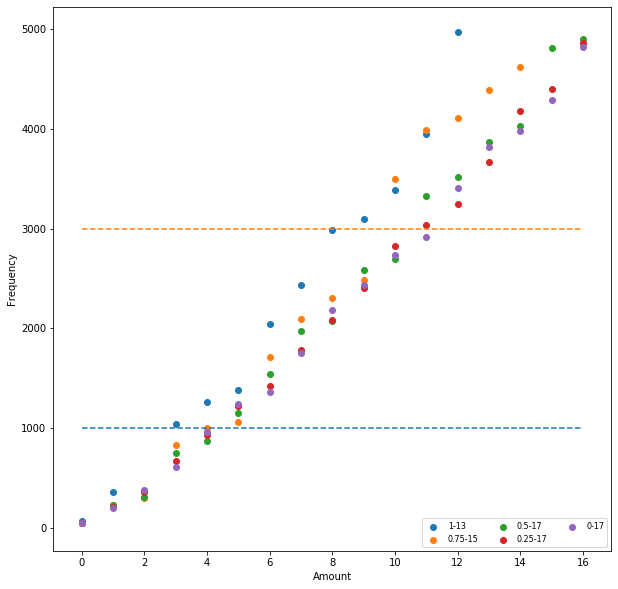

In [11]:
import matplotlib.pyplot as plt
x_boundary_1, x_boundary_2 = 1000,3000
y1,y2,y3,y4,y5 = data[1][data[1]>0],data[0.75][data[0.75]>0],data[0.5][data[0.5]>0],data[0.25][data[0.25]>0],data[0][data[0]>0]
x1,x2,x3,x4,x5 = [i for i in range(len(y1))],[i for i in range(len(y2))],[i for i in range(len(y3))],[i for i in range(len(y4))],[i for i in range(len(y5))]

plt.figure(figsize=(10,10))
z1 = plt.scatter(x1,y1)
z2 = plt.scatter(x2,y2)
z3 = plt.scatter(x3,y3)
z4 = plt.scatter(x4,y4)
z5 = plt.scatter(x5,y5)

plt.plot(data.index,[x_boundary_1 for i in range(len(y5))],'--')
plt.plot(data.index,[x_boundary_2 for i in range(len(y5))],'--')

plt.legend((z1, z2, z3, z4, z5),
           ('1-'+str(len(y1)), '0.75-'+str(len(y2)), '0.5-'+str(len(y3)), '0.25-'+str(len(y4)), '0-'+str(len(y5))),
           scatterpoints=1,
           loc='lower right',
           ncol=3,
           fontsize=8)

#plt.scatter(z,x)
plt.xlabel('Amount')
plt.ylabel('Frequency')
plt.savefig('general_data.jpg')
plt.show()

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit 
from sklearn.metrics import mean_squared_error
import math

def rmsle(y, y_pred):     
    assert len(y) == len(y_pred)
    terms_to_sum = [(math.log(y_pred[i] + 1) - math.log(y[i] + 1)) ** 2.0 for i,pred in enumerate(y_pred)]
    return (sum(terms_to_sum) * (1.0/len(y))) ** 0.5
def fitting_exp_function(x,y,file_name):
    # Curve Fitting Library

    def linear_model(x,m,b):
        return m * x + b
    def sin_test(x, a, b, d): 
        return a * np.sin(b * x) + d
    def exp_test(x, a, b, c): 
        return a * np.exp(b*x) + c 

    param, param_cov = curve_fit(exp_test, x, y) 
    ans = exp_test(x, *param) # (param[0] * x + param[1]) 

    print('MSE, Mean-Squared-Error: ' , mean_squared_error(y, ans))
    #print('RMSLE: ' , rmsle(y, ans))
    print("Function coefficients:", param) 
    print("Covariance of coefficients:") 
    print(param_cov) 

    plt.plot(x, y, 'o', color ='red', label ="data") 
    plt.plot(x, ans, '--', color ='blue', label ="optimized data") 
    plt.xlabel('Wavelength')
    plt.ylabel('Intensity')
    plt.savefig(file_name+'.png')
    plt.legend() 
    plt.show() 

MSE, Mean-Squared-Error:  19403.967633248114
Function coefficients: [ 1.07286614e+04  2.85931036e-02 -1.07515736e+04]
Covariance of coefficients:
[[ 1.14843321e+08 -2.62416029e+02 -1.15724960e+08]
 [-2.62416029e+02  6.00456574e-04  2.64368817e+02]
 [-1.15724960e+08  2.64368817e+02  1.16620074e+08]]


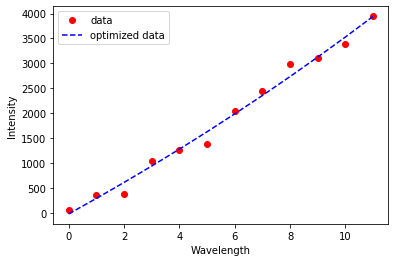

In [9]:
fitting_exp_function(data.index[:12],data[0][:12],'data_1')

MSE, Mean-Squared-Error:  34526.97700166689
Function coefficients: [ 3.97330132e+03  5.98895510e-02 -4.03379838e+03]
Covariance of coefficients:
[[ 4.40658838e+06 -4.60347931e+01 -4.62126284e+06]
 [-4.60347931e+01  4.83507489e-04  4.81607550e+01]
 [-4.62126284e+06  4.81607550e+01  4.85479124e+06]]


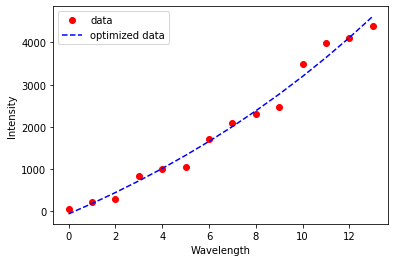

In [10]:
fitting_exp_function(data.index[:14],data[0.25][:14],'data_2')

MSE, Mean-Squared-Error:  13643.376120919316
Function coefficients: [ 7.89886756e+03  3.09870135e-02 -7.96324278e+03]
Covariance of coefficients:
[[ 9.03404215e+06 -2.79130414e+01 -9.21173369e+06]
 [-2.79130414e+01  8.64867675e-05  2.84404017e+01]
 [-9.21173369e+06  2.84404017e+01  9.39583336e+06]]


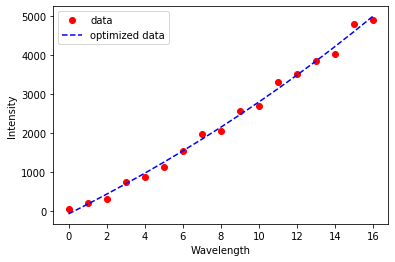

In [11]:
fitting_exp_function(data.index,data[0.5],'data_3')

MSE, Mean-Squared-Error:  3703.738802937227
Function coefficients: [ 6.49938473e+03  3.49929251e-02 -6.52852210e+03]
Covariance of coefficients:
[[ 1.49724039e+06 -6.16493797e+00 -1.53489504e+06]
 [-6.16493797e+00  2.54698066e-05  6.31339346e+00]
 [-1.53489504e+06  6.31339346e+00  1.57426919e+06]]


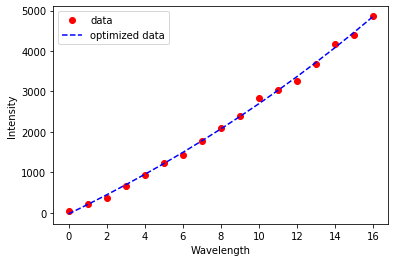

In [12]:
fitting_exp_function(data.index,data[0.75],'data_4')

MSE, Mean-Squared-Error:  6123.221024494156
Function coefficients: [ 7.81104493e+03  3.00767797e-02 -7.86024205e+03]
Covariance of coefficients:
[[ 4.57476579e+06 -1.39680043e+01 -4.65948963e+06]
 [-1.39680043e+01  4.27624996e-05  1.42166728e+01]
 [-4.65948963e+06  1.42166728e+01  4.74709705e+06]]


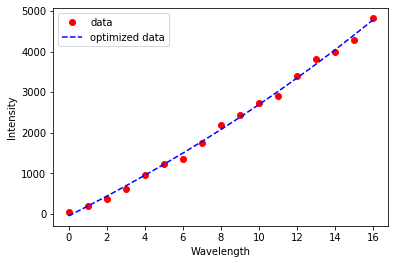

In [13]:
fitting_exp_function(data.index,data[1],'data_5')

In [13]:
initial, final = 0, 1000
data2 = data[(data>initial)&(data<=final)]
data2.count()

0.00    5
0.25    5
0.50    5
0.75    5
1.00    3
dtype: int64

In [14]:
initial, final = 1000, 3000
data3 = data[(data>initial)&(data<=final)]
data3.count()

0.00    7
0.25    6
0.50    6
0.75    5
1.00    6
dtype: int64

In [15]:
initial, final = 3000, 5000
data4 = data[(data>initial)&(data<=final)]
data4.count()

0.00    5
0.25    6
0.50    6
0.75    5
1.00    4
dtype: int64

In [16]:
data_test = pd.DataFrame()
data_test['0-1000'] = data2.count()
data_test['1000-3000'] = data3.count()
data_test['3000-5000'] = data4.count()
data_test['Sum'] = data_test['0-1000'] + data_test['1000-3000'] + data_test['3000-5000']
data_test

0-1000  1000-3000  3000-5000  Sum
0.00       5          7          5   17
0.25       5          6          6   17
0.50       5          6          6   17
0.75       5          5          5   15
1.00       3          6          4   13

1. https://docs.scipy.org/doc/scipy/reference/generated/scipy.special.jv.html
2. https://en.wikipedia.org/wiki/Bessel_function

\begin{equation*}
\mathbf{V}_1 \times \mathbf{V}_2 =  \begin{vmatrix}
\mathbf{i} & \mathbf{j} & \mathbf{k} \\
\frac{\partial X}{\partial u} &  \frac{\partial Y}{\partial u} & 0 \\
\frac{\partial X}{\partial v} &  \frac{\partial Y}{\partial v} & 0
\end{vmatrix}
\end{equation*}

In [18]:
'\begin{equation*}'
'\mathbf{V}_1 \times \mathbf{V}_2 =  \begin{vmatrix}'
'\mathbf{i} & \mathbf{j} & \mathbf{k} \\'
'\frac{\partial X}{\partial u} &  \frac{\partial Y}{\partial u} & 0 \\'
'\frac{\partial X}{\partial v} &  \frac{\partial Y}{\partial v} & 0'
'\end{vmatrix}'
'\end{equation*}'

'\\end{equation*}'

\begin{equation*}
P(E)   = {n \choose k} p^k (1-p)^{ n-k}
\end{equation*}

In [19]:
'\begin{equation*}'
'P(E)   = {n \choose k} p^k (1-p)^{ n-k}'
'\end{equation*}'

'\\end{equation*}'

\begin{equation*}
\left( \sum_{k=1}^n a_k b_k \right)^2 \leq \left( \sum_{k=1}^n a_k^2 \right) \left( \sum_{k=1}^n b_k^2 \right)
\end{equation*}

In [20]:
'\begin{equation*}'
'\left( \sum_{k=1}^n a_k b_k \right)^2 \leq \left( \sum_{k=1}^n a_k^2 \right) \left( \sum_{k=1}^n b_k^2 \right)'
'\end{equation*}'

'\\end{equation*}'

\begin{equation*}
\left( J_a \right)(x) \leq  \frac{\partial X}{\partial v!}  \left( \sum_{k=1}^n b_k^2 \right){x \choose 2}^{ 2m+a}
\end{equation*}

#### \sum_{k=1}^n 

\begin{equation*}
\left( \sum_{k=1}^n a_k b_k \right)^2 \leq \left( \sum_{k=1}^n a_k^2 \right) \left( \sum_{k=1}^n b_k^2 \right)
\end{equation*}

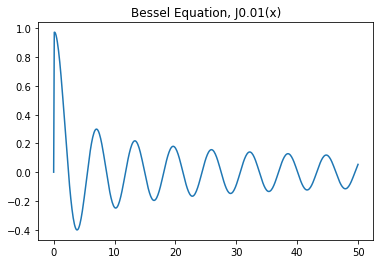

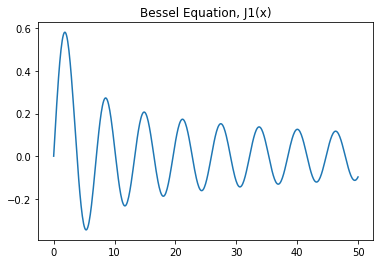

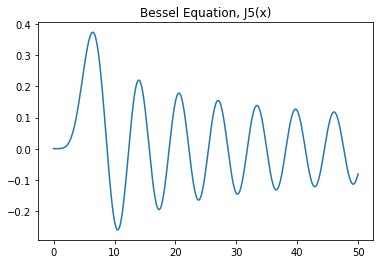

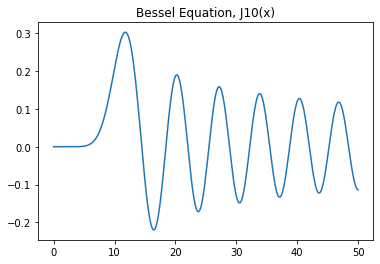

In [21]:
from scipy import special as spl
list_variable = [0.01,1,5,10]
for a in list_variable:
    x = np.linspace(0,50,500)
    y = spl.jv(a,x)
    plt.plot(x, y, '-')
    plt.title('Bessel Equation, J'+str(a)+'(x)')
    plt.show()

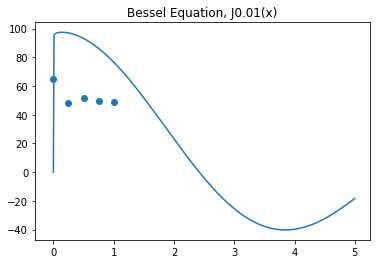

In [22]:
from scipy import special as spl
a = 0.01
x = np.linspace(0,5,500)
y = 100*spl.jv(a,x)
plt.plot(x, y, '-')
plt.scatter(datas.index,datas[0])
plt.title('Bessel Equation, J'+str(a)+'(x)')
plt.show()



In [23]:
rmsle([1,2,3,4], [1.5,2.5,4.6,6.1])

0.2782666366143899

In [24]:
def Bessel(a,b,x):
    return a*spl.jv(b,x)

In [25]:
param, param_cov = curve_fit(Bessel, x, y) 
ans = exp_test(x, *param) # (param[0] * x + param[1]) 

print('MSE, Mean-Squared-Error: ' , mean_squared_error(y, ans))
#print('RMSLE: ' , rmsle(y, ans))
print("Function coefficients:", param) 
print("Covariance of coefficients:") 
print(param_cov) 

plt.plot(x, y, 'o', color ='red', label ="data") 
plt.plot(x, ans, '--', color ='blue', label ="optimized data") 
plt.xlabel('Wavelength')
plt.ylabel('Intensity')
plt.savefig(file_name+'.png')
plt.legend() 
plt.show() 

RuntimeError: Optimal parameters not found: Number of calls to function has reached maxfev = 600.

In [ ]:
import matplotlib.pyplot as plt

fig, axes = plt.subplots(nrows=2, ncols=2)

datas_2.plot(ax=axes[0,0])
datas_2.plot(ax=axes[0,1])

In [ ]:
datas_2.plot(ax=axes[0,0])

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
plt.title('test1')
plt.scatter(datas.index,datas[0]) #no need to specify for first axis
plt.subplot(2,2,2)
plt.title('test2')
plt.scatter(datas.index,datas[1])
plt.subplot(2,2,3)
plt.title('test3')
plt.scatter(datas.index,datas[2])
plt.subplot(2,2,4)
plt.title('test4')
plt.scatter(datas.index,datas[4])

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(2,3,1)
plt.title('test1')
plt.plot(datas.index,datas[0]) #no need to specify for first axis
plt.subplot(2,3,2)
plt.title('test2')
plt.plot(datas.index,datas[1])
plt.subplot(2,3,3)
plt.title('test3')
plt.plot(datas.index,datas[2])
plt.subplot(2,3,4)
plt.title('test4')
plt.plot(datas.index,datas[3])
plt.subplot(2,3,5)
plt.title('test4')
plt.plot(datas.index,datas[4])
plt.subplot(2,3,6)
plt.title('test4')
plt.plot(datas.index,datas[5])

In [ ]:
plt.figure(figsize=(10,10))
for i in range(6):
    plt.subplot(2,3,i+1)
    plt.title('test'+str(i+1))
    plt.plot(datas.index,datas[i]) #no need to specify for first axis

In [ ]:
multiplot((10,10),datas.index,[2,3],datas)

In [ ]:
r = 3
label = 1.6

x = np.linspace(-3,3,1000)
coef = 1 - (s**2)*(x**2)/r**2
y_ = np.sqrt((1-x**2)/coef)


plt.plot(x,y_)
plt.plot(x,-y_)
plt.xlim(-label,label)
plt.ylim(-label,label)

In [56]:
import pandas as pd
squircle_table = pd.DataFrame()

cons = 11
r, label = 3, 1.6
x = np.linspace(-3,3,1000)
s_list = [3*i/10 for i in range(cons)]

for s in s_list:
    coef = 1 - (s**2)*(x**2)/r**2
    y_ = np.sqrt((1-x**2)/coef)
    squircle_table[s] = list(y_)
    
squircle_table

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in sqrt
  # This is added back by InteractiveShellApp.init_path()
C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in true_divide
  # This is added back by InteractiveShellApp.init_path()


0.0  0.3  0.6  0.9       1.2       1.5       1.8       2.1       2.4  \
0    NaN  NaN  NaN  NaN  4.264014  2.529822  1.889822  1.531679  1.296407   
1    NaN  NaN  NaN  NaN  4.282533  2.533260  1.891044  1.532197  1.296629   
2    NaN  NaN  NaN  NaN  4.301428  2.536736  1.892276  1.532719  1.296852   
3    NaN  NaN  NaN  NaN  4.320712  2.540251  1.893520  1.533246  1.297077   
4    NaN  NaN  NaN  NaN  4.340397  2.543806  1.894775  1.533777  1.297304   
..   ...  ...  ...  ...       ...       ...       ...       ...       ...   
995  NaN  NaN  NaN  NaN  4.340397  2.543806  1.894775  1.533777  1.297304   
996  NaN  NaN  NaN  NaN  4.320712  2.540251  1.893520  1.533246  1.297077   
997  NaN  NaN  NaN  NaN  4.301428  2.536736  1.892276  1.532719  1.296852   
998  NaN  NaN  NaN  NaN  4.282533  2.533260  1.891044  1.532197  1.296629   
999  NaN  NaN  NaN  NaN  4.264014  2.529822  1.889822  1.531679  1.296407   

          2.7  3.0  
0    1.127768  1.0  
1    1.127845  1.0  
2    1.127922  1.0  
3    1.128000  1.0  
4    1.128079  1.0  
..        ...  ...  
995  1.128079  1.0  
996  1.128000  1.0  
997  1.127922  1.0  
998  1.127845  1.0  
999  1.127768  1.0  

[1000 rows x 11 columns]

In [ ]:
x = np.linspace(-3,3,1000)
plt.figure(figsize=(10,10))
for i in range(6):
    y_ = squircle_table[i*0.3]
    plt.subplot(2,3,i+1)
    plt.title('test'+str(i+1))
    plt.plot(x,y_) #no need to specify for first axis
    plt.plot(x,-y_)

In [ ]:
squircle_table.columns, squircle_table.columns[4:-1]

In [ ]:
label = 1.6
x = np.linspace(-3,3,1000)
for i in squircle_table.columns:
    y_ = squircle_table[i]
    plt.plot(x,y_)
    plt.plot(x,-y_)
    plt.xlim(-label,label)
    plt.ylim(-label,label)
    plt.title('Square Parameter of ' +str(i))
    plt.show()

In [ ]:
def multiplot(dimension_graph,pandas_x,dimension_data,datas,c=1):
    plt.figure(figsize=(dimension_graph))
    dimension = dimension_data[0]*dimension_data[1] #(row, columns)=(y,x)
    print(dimension,x,y)
    for i in range(dimension):
        plt.subplot(dimension_data[0],dimension_data[1],i+1)
        plt.title('test'+str(i+1))
        plt.scatter(pandas_x,datas[i*c])

In [ ]:
x = np.linspace(-3,3,1000)
multiplot((10,10),x,[2,5],squircle_table,c=0.3)

In [ ]:
label = 1.6
x = np.linspace(-3,3,1000)
for i in squircle_table.columns[4:-1]:
    y_ = squircle_table[i]
    plt.plot(x,y_)
    plt.plot(x,-y_)
    plt.xlim(-label,label)
    plt.ylim(-label,label)
    plt.title('Square Parameter of ' +str(i))
    plt.show()

In [ ]:
cons = 10

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in sqrt
  """


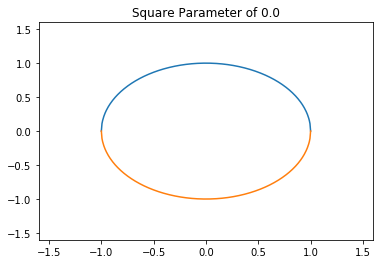

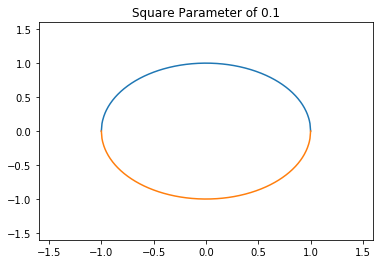

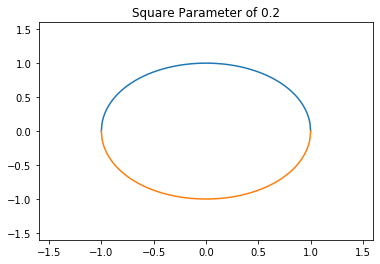

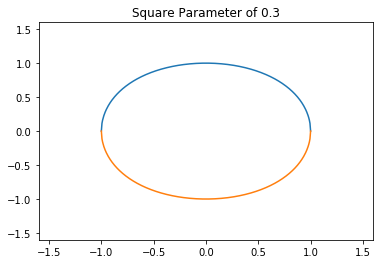

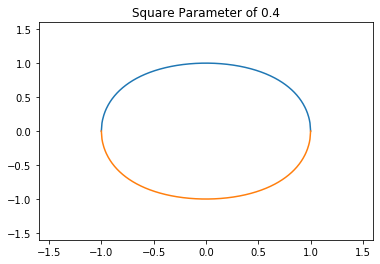

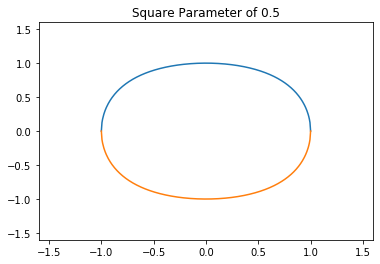

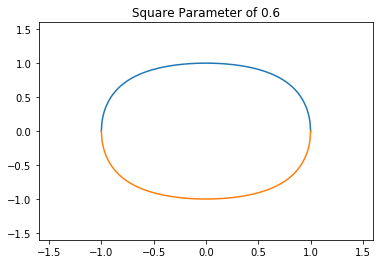

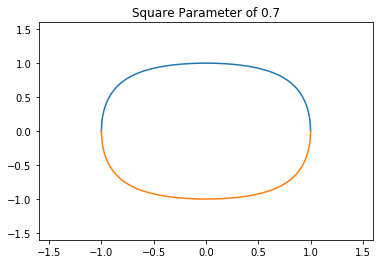

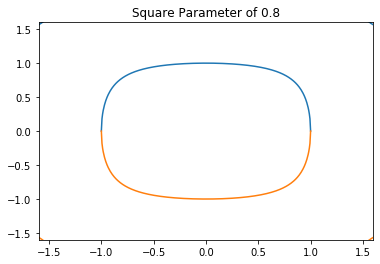

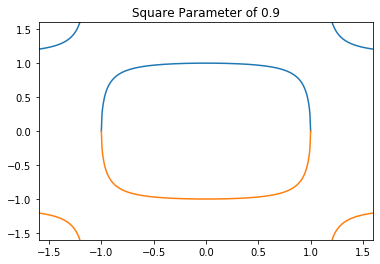

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:5: RuntimeWarning: invalid value encountered in true_divide
  """


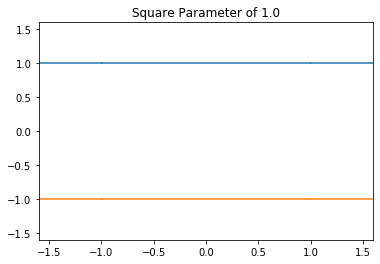

In [51]:
def squircle_func(r,s):
    # https://en.wikipedia.org/wiki/Squircle
    x = np.linspace(-3,3,1000)
    coef = 1 - (s**2)*(x**2)/r**2
    y_ = np.sqrt((1-x**2)/coef)
    return x,y_

    x,y_ = squircle_func(r,s)
    plt.plot(x,y_)
    plt.plot(x,-y_)
    plt.xlim(-label,label)
    plt.ylim(-label,label)
def squircle(r,s,label):
    x,y_ = squircle_func(r,s)
    plt.plot(x,y_)
    plt.plot(x,-y_)
    plt.xlim(-label,label)
    plt.ylim(-label,label)
    plt.title('Square Parameter of '+str(round(s/r,1)))
    plt.show()
for i in range(11):
    squircle(3,3*i/10,1.6)

In [ ]:

import numpy as np
x = np.array([1,2,3])
x


In [ ]:
x1 = np.linspace(1,5,100)
y1 = np.exp(x1)
y2 = np.exp(-x1)

In [ ]:
y = np.exp(x)
y

In [ ]:
plt.scatter(x1,y1)

In [ ]:
plt.scatter(x1,y2)

In [ ]:
def exponential_superposition(a,b,size):
    x = np.linspace(1,5,100)
    y = a*np.exp(x)+b*np.exp(-x)
    plt.figure(figsize=size)
    plt.subplot(1,3,1)
    plt.title('Exp. Grow')
    plt.scatter(x,np.exp(x))
    plt.subplot(1,3,2)
    plt.title('Exp. Decay')
    plt.scatter(x,np.exp(-x))
    plt.subplot(1,3,3)
    plt.title('Superposition')
    plt.scatter(x,y)
    plt.show()

In [ ]:
exponential_superposition(3,2,(10,10))

In [ ]:
plt.figure(figsize=(10,10))
plt.subplot(2,3,1)
plt.title('test1')
plt.plot(datas.index,datas[0]) #no need to specify for first axis

In [ ]:
from scipy import special as spl
list_variable = [0.01,1,5,10]
for a in list_variable:
    x = np.linspace(0,50,500)
    y = spl.jv(a,x)
    plt.plot(x, y, '-')
    plt.title('Bessel Equation, J'+str(a)+'(x)')
    plt.show()

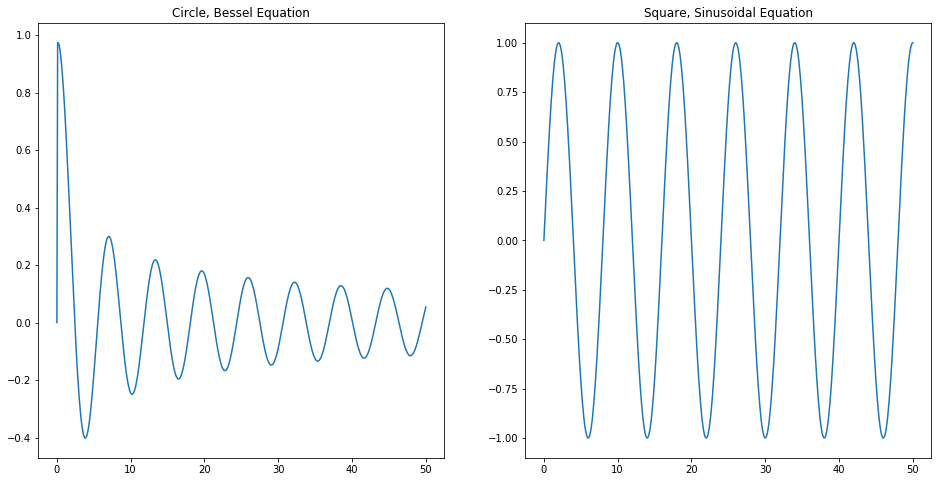

In [35]:
x = np.linspace(0,50,500)
y1 = spl.jv(a,x)
y2 = np.sin(np.pi*x/4)

plt.figure(figsize=(16,8))
plt.subplot(1,2,1)
plt.title('Circle, Bessel Equation')
plt.plot(x,y1) 
plt.subplot(1,2,2)
plt.title('Square, Sinusoidal Equation')
plt.plot(x,y2)
plt.savefig('square-circle heat comparison')